Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
import numpy as np
import matplotlib.pyplot as plt

Load MNIST Dataset

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Normalize the dataset

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Creating Baseline model

In [ ]:
def create_baseline_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Train baseline model

In [ ]:
baseline_model = create_baseline_model()
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

Training Baseline model...
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8833 - loss: 0.4246 - val_accuracy: 0.9597 - val_loss: 0.1284
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9631 - loss: 0.1237 - val_accuracy: 0.9718 - val_loss: 0.0916
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9755 - loss: 0.0823 - val_accuracy: 0.9734 - val_loss: 0.0873
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9819 - loss: 0.0589 - val_accuracy: 0.9767 - val_loss: 0.0757
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9772 - val_loss: 0.0782
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9760 - val_loss: 0.0806
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9779 - val_loss: 0.0757
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accu

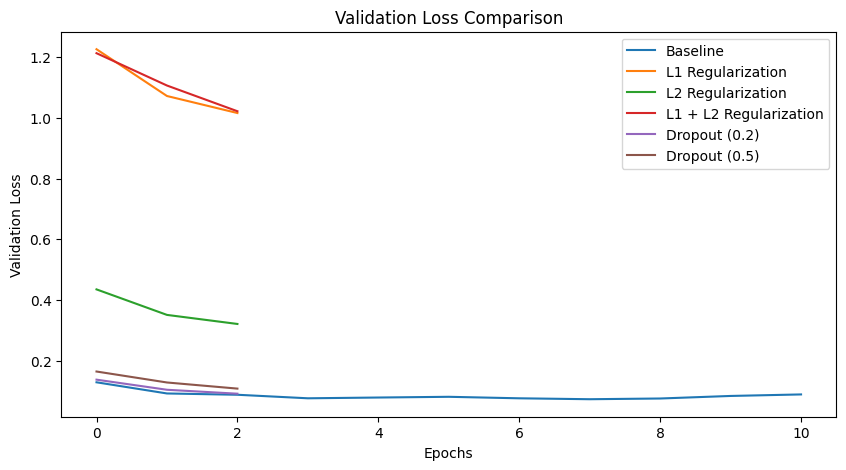

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Baseline Model
def build_baseline_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Model with 5 hidden layers, each having 500 nodes
def build_deep_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train and Evaluate Models
def train_and_evaluate(model, model_name):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32, callbacks=[early_stopping])
    return history

# Train all models
histories = {}
models = {
    'Baseline': build_baseline_model(),
    'Deep Model': build_deep_model()
}

for name, model in models.items():
    print(f"Training {name} model...")
    histories[name] = train_and_evaluate(model, name)

# Plot Results
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss Comparison')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train.reshape(-1, 28, 28, 1))  # Reshaping for augmentation

# Function to build models
def build_model(regularizer=None, dropout_rate=None):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizer),
    ])

    # Apply Dropout if specified
    if dropout_rate:
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train and Evaluate Models
def train_and_evaluate(model, model_name, augment=False):
    print(f"Training {model_name} model...")
    if augment:
        history = model.fit(datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32),
                            validation_data=(x_test, y_test), epochs=20, callbacks=[early_stopping])
    else:
        history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                            epochs=20, batch_size=32, callbacks=[early_stopping])
    return history

# Define models with different regularization techniques
models = {
    'Baseline': build_model(),
    'L1 Regularization': build_model(regularizer=regularizers.l1(0.01)),
    'L2 Regularization': build_model(regularizer=regularizers.l2(0.01)),
    'L1 + L2 Regularization': build_model(regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    'Dropout (0.2)': build_model(dropout_rate=0.2),
    'Dropout (0.5)': build_model(dropout_rate=0.5),
    'Data Augmentation': build_model(),
    'Combined (L2 + Dropout + Augmentation)': build_model(regularizer=regularizers.l2(0.01), dropout_rate=0.2),
}

# Train all models and store histories
histories = {}
for name, model in models.items():
    augment = name == 'Data Augmentation' or name == 'Combined (L2 + Dropout + Augmentation)'
    histories[name] = train_and_evaluate(model, name, augment=augment)

# Plot Results
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss Comparison')
plt.show()


Training Baseline model...
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.8833 - loss: 0.3810 - val_accuracy: 0.9559 - val_loss: 0.1538
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9674 - loss: 0.1183 - val_accuracy: 0.9664 - val_loss: 0.1206
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9760 - loss: 0.0881 - val_accuracy: 0.9727 - val_loss: 0.0969
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9804 - loss: 0.0685 - val_accuracy: 0.9779 - val_loss: 0.0959
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9849 - loss: 0.0546 - val_accuracy: 0.9761 - val_loss: 0.1054
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9860 - loss: 0.0496 - val_accuracy: 0.9736 - val_loss: 0.1157
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9877 - loss: 0.0433 - val_accuracy: 0.9797 - val_loss: 0.0827
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23m